In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed

# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python

# For example, here's several helpful packages to load



import numpy as np # linear algebra

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



# Input data files are available in the read-only "../input/" directory

# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory



import os

for dirname, _, filenames in os.walk('/kaggle/input'):

    for filename in filenames:

        print(os.path.join(dirname, filename))



# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 

# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [6]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv('digit-recognizer/train.csv')


In [7]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape


In [8]:
Y_train

array([8, 6, 1, ..., 2, 0, 7])

In [9]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2


In [10]:
import numpy as np

import pandas as pd

from matplotlib import pyplot as plt

In [13]:
data = pd.read_csv('digit-recognizer/train.csv')

In [14]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2


In [15]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)


Iteration:  0
[3 5 8 ... 3 3 6] [8 6 1 ... 2 0 7]
0.10792682926829268
Iteration:  10
[0 5 8 ... 0 0 4] [8 6 1 ... 2 0 7]
0.2116341463414634
Iteration:  20
[0 5 8 ... 0 0 4] [8 6 1 ... 2 0 7]
0.30429268292682926
Iteration:  30
[0 6 8 ... 2 0 4] [8 6 1 ... 2 0 7]
0.375390243902439
Iteration:  40
[0 6 8 ... 2 0 4] [8 6 1 ... 2 0 7]
0.4376829268292683
Iteration:  50
[0 6 8 ... 2 0 4] [8 6 1 ... 2 0 7]
0.4907560975609756
Iteration:  60
[5 6 1 ... 2 0 4] [8 6 1 ... 2 0 7]
0.5380731707317074
Iteration:  70
[5 6 1 ... 2 0 7] [8 6 1 ... 2 0 7]
0.5762195121951219
Iteration:  80
[2 6 1 ... 2 0 7] [8 6 1 ... 2 0 7]
0.6114390243902439
Iteration:  90
[2 6 1 ... 2 0 7] [8 6 1 ... 2 0 7]
0.6415121951219512
Iteration:  100
[8 6 1 ... 2 0 7] [8 6 1 ... 2 0 7]
0.6674878048780488
Iteration:  110
[8 6 1 ... 2 0 7] [8 6 1 ... 2 0 7]
0.689560975609756
Iteration:  120
[8 6 1 ... 2 0 7] [8 6 1 ... 2 0 7]
0.7078292682926829
Iteration:  130
[8 6 1 ... 2 0 7] [8 6 1 ... 2 0 7]
0.7235121951219512
Iteration:  140
[

In [16]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()


Prediction:  [5]
Label:  5


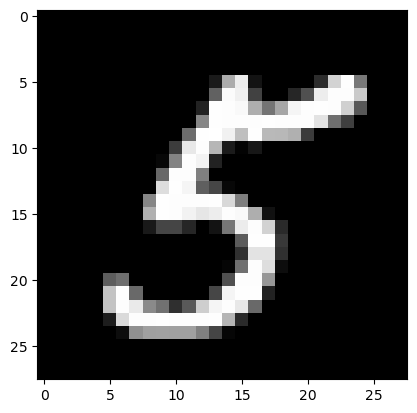

Prediction:  [6]
Label:  6


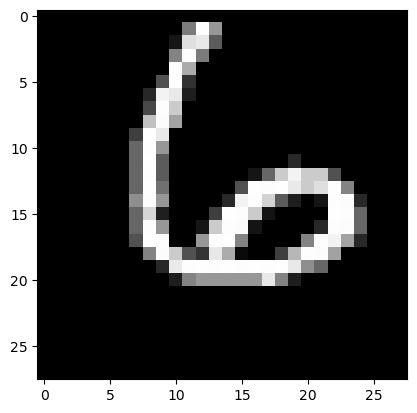

Prediction:  [1]
Label:  1


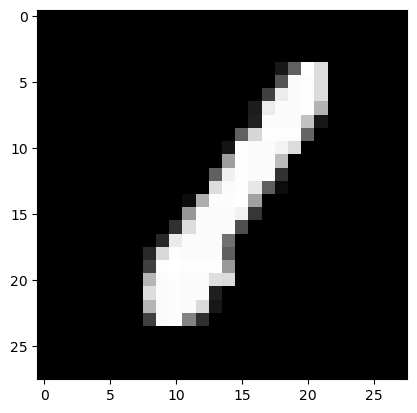

Prediction:  [2]
Label:  2


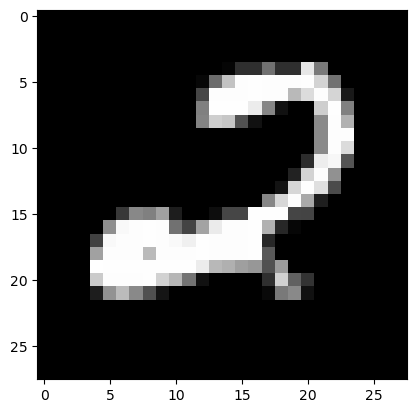

In [17]:
test_prediction(150, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(34, W1, b1, W2, b2)

In [18]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[5 7 8 5 0 1 9 7 1 1 8 5 4 0 6 2 9 4 4 7 8 2 5 1 6 6 5 7 8 1 1 5 1 3 0 4 6
 1 6 5 9 0 4 7 3 2 4 3 6 2 8 6 5 9 8 3 6 3 1 3 9 1 0 8 4 7 0 9 8 8 6 1 4 8
 3 5 6 6 4 8 3 5 2 7 7 3 8 5 7 0 7 0 0 6 7 6 4 0 4 1 9 0 3 3 5 5 6 0 5 8 8
 9 0 9 7 3 3 5 7 5 4 7 9 7 5 3 8 2 3 2 2 8 8 1 3 6 7 5 2 6 8 0 1 7 7 7 8 6
 7 0 9 1 9 8 9 1 2 8 8 0 9 5 8 9 1 3 3 4 1 3 5 3 1 0 1 1 7 9 9 2 2 1 1 8 7
 1 2 8 1 1 7 5 8 4 2 2 9 1 7 9 4 7 2 1 6 0 1 0 8 1 3 2 3 9 2 6 6 6 9 0 1 1
 8 1 8 6 2 7 7 7 5 9 9 3 0 6 7 1 3 4 9 7 8 4 7 2 2 4 6 1 8 2 1 4 2 4 1 7 0
 1 4 2 3 7 6 2 1 9 0 7 3 5 6 5 2 6 3 0 2 3 1 0 9 2 7 0 8 7 5 5 0 2 1 1 8 3
 2 0 7 2 4 5 5 0 1 1 7 8 7 6 2 6 4 4 7 5 4 9 7 0 1 4 7 0 5 5 9 2 5 1 8 9 0
 7 1 9 1 0 1 9 8 4 9 3 8 3 4 9 2 3 6 9 8 8 5 5 5 0 2 3 2 6 6 0 5 6 2 1 0 7
 1 0 7 8 3 7 8 0 9 8 3 1 2 4 6 8 9 7 7 2 6 6 7 4 9 8 6 9 2 5 9 9 2 5 1 4 5
 8 7 5 0 2 3 4 5 4 0 7 2 7 5 2 8 1 5 1 9 2 0 1 3 8 1 0 4 5 5 0 3 7 4 8 7 3
 2 9 5 8 1 6 8 1 3 4 6 4 7 2 2 4 6 9 6 8 7 2 1 7 4 8 6 0 3 3 2 2 9 4 3 6 6
 7 5 9 2 7 8 4 8 7 9 0 4 

0.861

In [19]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
data = np.array(data)

In [21]:
data

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [7, 0, 0, ..., 0, 0, 0],
       [6, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0]])

In [22]:
data = np.array(data)

m, n = data.shape



np.random.shuffle(data)



data_dev = data[0:1000].T

Y_dev = data_dev[0]

X_dev = data_dev[1:n]



data_train = data[1000:m].T

Y_train = data_train[0]

X_train = data_train[1:n]

In [23]:
X_train[:, 0].shape

(784,)

In [24]:
def init_params():

    W1 = np.random.randn(10, 784)

    b1 = np.random.randn(10, 1)

    W2 = np.random.randn(10, 10)

    b2 = np.random.randn(10, 1)

    return W1, b1, W2, b2



def ReLU(Z):

    return np.maximum(0, Z)



def softmax(Z):

    return np.exp(Z)/np.sum(np.exp(Z))



def forward_prop(W1, b1, W2, b2, X):

    Z1 = W1.dot(X) + b1

    A1 = ReLU(Z1)

    Z2 = W2.dot(A1) + b2

    A2 = softmax(A1)

    return Z1, A1, Z2, A2



def one_hot(Y):

    one_hot_Y = np.zeros((Y.size, Y.max() + 1))

    one_hot_Y[np.arange(Y.size), Y] = 1

    one_hot_Y = one_hot_Y.T

    return one_hot_Y



def deriv_ReLU(Z):

    return Z > 0



def back_prop(Z1, A1, Z2, A2, W2, X, Y):

    m = Y.size

    one_hot_Y = one_hot(Y)

    dZ2 = A2 - one_hot_Y

    dW2 = 1 / m * dZ2.dot(A1.T)
    
    db2 = 1 / m * np.sum(dZ2)

    dZ1 = W2.T.dot(dZ2) * deriv_ReLU(Z1)

    dW1 = 1 / m * dZ1.dot(X.T)

    db1 = 1 / m * np.sum(dZ1, 2)

    return dW1, db1, dW2, db2



def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):

    W1 = W1 - alpha * dW1

    b1 = b1 -alpha * db1

    W2 = W2 - alpha * dW2

    b2 = b2 -alpha * db2

    return W1, b1, W2, b2

In [25]:
def get_prediction(A2):

    return np.argmax(A2, 0)



def get_accuracy(predictions, Y):

    print(predictions, Y)

    return np.sum(predictions == Y) / Y.size



def gradient_descent(X,Y, iterations, alpha):

    W1, b1, W2, b2 = init_params()

    for i in range(iterations):

        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)

        dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W2, X, Y)

        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)

        if i % 50 == 0:

            print("Iteration: ", i)

            print("Accuracy: ", get_accuracy(get_prediction(A2), Y))

        return W1, b1, W2, b2

In [26]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 500, 0.1)

/var/folders/35/vw_j2d_n7kj95gf_rltgld9h0000gn/T/ipykernel_6847/2795628486.py:23: RuntimeWarning: overflow encountered in exp
  return np.exp(Z)/np.sum(np.exp(Z))
/var/folders/35/vw_j2d_n7kj95gf_rltgld9h0000gn/T/ipykernel_6847/2795628486.py:23: RuntimeWarning: invalid value encountered in divide
  return np.exp(Z)/np.sum(np.exp(Z))


AxisError: axis 2 is out of bounds for array of dimension 2

In [ ]:
def deriv_ReLU(Z):

    return Z > 0
